In [1]:
import nxsdk.api.n2a as nx
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
from gridAgent import *

In [3]:
grid_x = 5
grid_y = 5
dimensions = 2

n_states = grid_x * grid_y
n_actions = 4
n_estimates = n_states * n_actions
n_replicates = 2
dynrange = 2

In [4]:
n_estimates

100

In [5]:
t_epoch = 128
n_epochs = 50

In [6]:
agent = GridAgent(n_epochs=n_epochs, debug=True, n_replicates=n_replicates, dynrange=dynrange)

In [7]:
#dec_spks = agent.decoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [8]:
#enc_spks = agent.encoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [9]:
#hc_spks = agent.hippocampus.blocks['state_memory'].get_outputs().probe(nx.ProbeParameter.SPIKE)

In [10]:
#ctx_spks = agent.cortex.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [11]:
agent.transitions

array([[[1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0]]])

In [13]:
agent.transitions[0,:,4]

array([0, 0, 0, 0, 0])

In [14]:
agent.transitions[1,4,:]

array([0, 0, 0, 0, 0])

In [15]:
net = agent.network

In [16]:
results = []
runs = 1
for i in range(runs):
    results.append(agent.run())
agent.board.disconnect()

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.106:44661
INFO:DRV:      Host server up..............Done 0.21s
INFO:DRV:      Encoding axons/synapses.....Done 0.33s
INFO:DRV:      Compiling Embedded snips....Done 0.37s
INFO:HST:  Args chip=0 cpu=0 /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592851290.741803/launcher_chip0_lmt0.bin --chips=1 --remote-relay=1 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 2.02s
INFO:DRV:      Encoding probes.............Done 0.85ms
INFO:DRV:      Transferring probes.........Done 3.04ms
INFO:DRV:      Configuring registers.......Done 0.13s
INFO:DRV:      Transferring spikes.........Done 0.83ms
INFO:HST:  chip=0 cpu=0 Setting up...
INFO:HST:  chip=0 cpu=0 Got variables
INFO:HST:  chip=0 cpu=0 Got R/P/State/Condition compartments
INFO:HST:  chip=0 cpu=0 Got Counter compartments
INFO:HST:  chip=0 cpu=0 Got estimate locs & values, done.
IN

INFO:HST:  chip=0 cpu=0 DEBUG: X=4 Y=0
INFO:HST:  chip=0 cpu=0 DEBUG: state 4 core 4 axon 981 t3328
INFO:HST:  chip=0 cpu=0 DEBUG : action 3 core 4 axon 1005 t3456
INFO:HST:  chip=0 cpu=0 DEBUG: New episode started
INFO:HST:  chip=0 cpu=0 DEBUG: punishment, core 5 axon 772 t3456
INFO:HST:  chip=0 cpu=0 DEBUG: X=4 Y=4
INFO:HST:  chip=0 cpu=0 DEBUG: state 24 core 4 axon 1001 t3456
INFO:HST:  chip=0 cpu=0 DEBUG : action 0 core 4 axon 1002 t3584
INFO:HST:  chip=0 cpu=0 DEBUG: X=4 Y=4
INFO:HST:  chip=0 cpu=0 DEBUG: state 24 core 4 axon 1001 t3584
INFO:HST:  chip=0 cpu=0 DEBUG : action 0 core 4 axon 1002 t3712
INFO:HST:  chip=0 cpu=0 DEBUG: X=4 Y=4
INFO:HST:  chip=0 cpu=0 DEBUG: state 24 core 4 axon 1001 t3712
INFO:HST:  chip=0 cpu=0 DEBUG : action 2 core 4 axon 1004 t3840
INFO:HST:  chip=0 cpu=0 DEBUG: X=4 Y=3
INFO:HST:  chip=0 cpu=0 DEBUG: state 19 core 4 axon 996 t3840
INFO:HST:  chip=0 cpu=0 DEBUG : action 0 core 4 axon 1002 t3968
INFO:HST:  chip=0 cpu=0 DEBUG: X=4 Y=4
INFO:HST:  chip=0 

In [17]:
import pandas as pd

In [18]:
def read_history(state_actions):
    conversion = {0: 'N', 1: 'E', 2: 'S', 3: 'W'}
    
    data = {'X' : state_actions[:,0], 'Y' : state_actions[:,1]}
    data['Action'] = [conversion[x] for x in state_actions[:,2]]
    
    df = pd.DataFrame(data)
    return df

In [19]:
conversion = {0: 'N', 1: 'E', 2: 'S', 3: 'W'}

In [20]:
sa = results[-1][0]

In [21]:
hist = read_history(sa)

In [22]:
hist

,Action,X,Y
0,N,1,2
1,W,1,3
2,S,0,3
3,E,0,2
4,S,1,2
5,N,1,1
6,S,1,2
7,W,1,1
8,W,0,1
9,E,0,1


In [18]:
results[-1]

(array([[1, 2, 0],
        [1, 3, 3],
        [0, 3, 3],
        ...,
        [3, 2, 0],
        [3, 3, 3],
        [2, 3, 2]]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([[    0,     0,     0,     0],
        [30720, 30720, 30720, 30720],
        [15872, 15872, 15872, 15872],
        ...,
        [29568, 16640, 15744, 15872],
        [16640, 16128, 15616, 30592],
        [15872, 15872, 30848, 16512]]))

In [19]:
rewards = results[-1][1]
rwd_inds = rewards != 0
returns = rewards[rwd_inds]

In [20]:
len(returns)

2872

In [21]:
returns[-100:]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

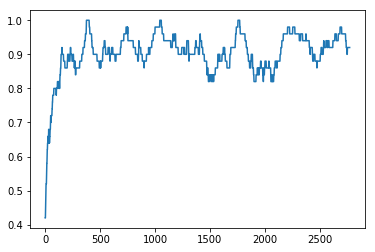

In [22]:
plt.plot(np.convolve(returns, np.ones(100),mode='valid')/100)

In [23]:
results[-1][0].shape

(10000, 3)

In [24]:
data = results[-1][0]

In [25]:
np.unique(data[:,0])

array([0, 1, 2, 3, 4])

In [26]:
np.unique(data[:,1])

array([0, 1, 2, 3, 4])

In [27]:
np.unique(data[:,2])

array([0, 1, 2, 3])

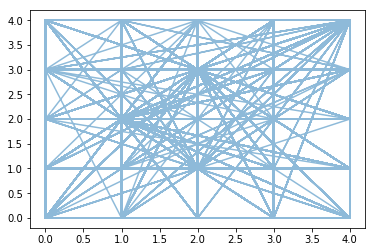

In [28]:
plt.plot(results[-1][0][:,0], results[-1][0][:,1], alpha=0.50)

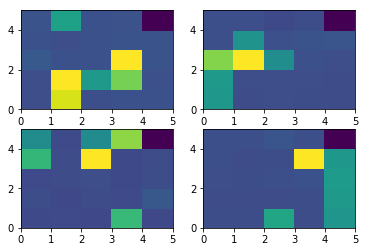

In [31]:
plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.pcolor(np.mean(agent.final_estimates[i,...], axis=1).reshape(5,5))

In [32]:
plt.plot(agent.final_estimates.reshape(25,12))

ValueError: cannot reshape array of size 200 into shape (25,12)